**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml/blob/master/10_introduction_to_artificial_neural_networks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

**Warning**: this is the code for the 1st edition of the book. Please visit https://github.com/ageron/handson-ml2 for the 2nd edition code, with up-to-date notebooks using the latest library versions. In particular, the 1st edition is based on TensorFlow 1, while the 2nd edition uses TensorFlow 2, which is much simpler to use.

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [24]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    tf.compat.v1.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

线性阈值单元
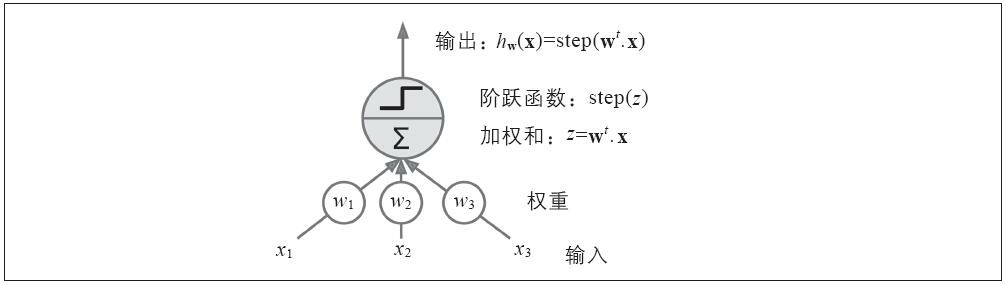

In [2]:
import numpy as np
from sklearn.datasets import load_iris
# 感知器
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

"""
在Scikit-Learn里， Perceptron类的行为等同于使用以下超参数的
SGDClassifier： loss="perceptron"， learning_rate="constant"，eta0=1（学习速率），以及penalty=None（不做正则化）
"""
per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-48e3bf4502d4>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


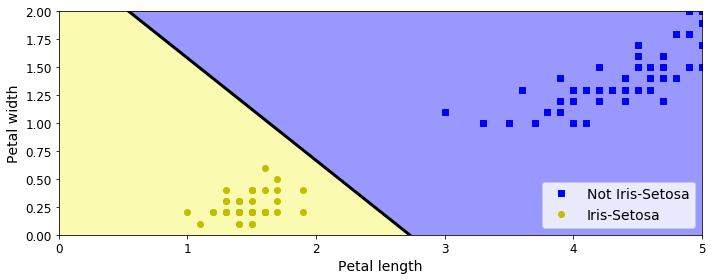

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


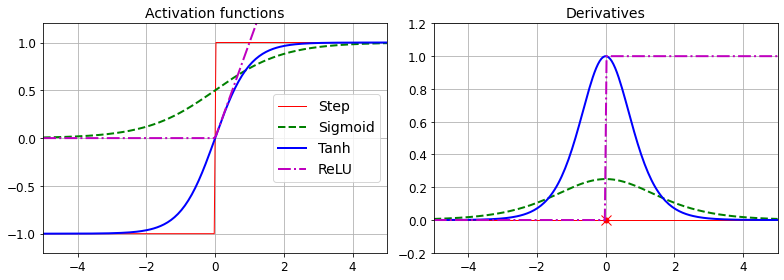

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

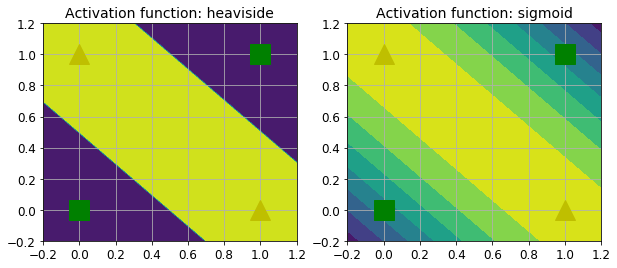

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## Using the Estimator API (formerly `tf.contrib.learn`)

In [9]:
import tensorflow as tf

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

In [12]:
# 加载数据 分割训练集 测试集
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [15]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
# 训练一个用于分类有两个隐藏层（一个有300个神经元，另一个有100个），以及一个softmax输出层的具有10个神经元的DNN：
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)
# 输入数据
input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
# 训练
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmp81gcq61i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tens

INFO:tensorflow:loss = 0.23484772, step = 6700 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.965
INFO:tensorflow:loss = 0.37838638, step = 6800 (0.173 sec)
INFO:tensorflow:global_step/sec: 586.358
INFO:tensorflow:loss = 0.35215473, step = 6900 (0.180 sec)
INFO:tensorflow:global_step/sec: 522.228
INFO:tensorflow:loss = 0.3061586, step = 7000 (0.183 sec)
INFO:tensorflow:global_step/sec: 501.338
INFO:tensorflow:loss = 0.34924698, step = 7100 (0.199 sec)
INFO:tensorflow:global_step/sec: 541.984
INFO:tensorflow:loss = 0.32349795, step = 7200 (0.189 sec)
INFO:tensorflow:global_step/sec: 482.057
INFO:tensorflow:loss = 0.18350369, step = 7300 (0.202 sec)
INFO:tensorflow:global_step/sec: 596.831
INFO:tensorflow:loss = 0.3899086, step = 7400 (0.178 sec)
INFO:tensorflow:global_step/sec: 491.508
INFO:tensorflow:loss = 0.3049612, step = 7500 (0.193 sec)
INFO:tensorflow:global_step/sec: 582.951
INFO:tensorflow:loss = 0.40873703, step = 7600 (0.182 sec)
INFO:tensorflow:global_step/sec: 531.394
INF

INFO:tensorflow:loss = 0.27955782, step = 14900 (0.170 sec)
INFO:tensorflow:global_step/sec: 550.916
INFO:tensorflow:loss = 0.10117051, step = 15000 (0.181 sec)
INFO:tensorflow:global_step/sec: 501.341
INFO:tensorflow:loss = 0.18204015, step = 15100 (0.190 sec)
INFO:tensorflow:global_step/sec: 572.957
INFO:tensorflow:loss = 0.20707355, step = 15200 (0.183 sec)
INFO:tensorflow:global_step/sec: 524.961
INFO:tensorflow:loss = 0.16162615, step = 15300 (0.184 sec)
INFO:tensorflow:global_step/sec: 622.78
INFO:tensorflow:loss = 0.18801211, step = 15400 (0.173 sec)
INFO:tensorflow:global_step/sec: 434.059
INFO:tensorflow:loss = 0.18934992, step = 15500 (0.218 sec)
INFO:tensorflow:global_step/sec: 630.613
INFO:tensorflow:loss = 0.33509964, step = 15600 (0.167 sec)
INFO:tensorflow:global_step/sec: 541.987
INFO:tensorflow:loss = 0.33524814, step = 15700 (0.184 sec)
INFO:tensorflow:global_step/sec: 449.631
INFO:tensorflow:loss = 0.19150028, step = 15800 (0.224 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 544.933
INFO:tensorflow:loss = 0.37210113, step = 23100 (0.175 sec)
INFO:tensorflow:global_step/sec: 596.832
INFO:tensorflow:loss = 0.19622818, step = 23200 (0.172 sec)
INFO:tensorflow:global_step/sec: 472.961
INFO:tensorflow:loss = 0.059577648, step = 23300 (0.204 sec)
INFO:tensorflow:global_step/sec: 511.569
INFO:tensorflow:loss = 0.24320664, step = 23400 (0.195 sec)
INFO:tensorflow:global_step/sec: 576.25
INFO:tensorflow:loss = 0.12836987, step = 23500 (0.181 sec)
INFO:tensorflow:global_step/sec: 447.615
INFO:tensorflow:loss = 0.23059681, step = 23600 (0.222 sec)
INFO:tensorflow:global_step/sec: 445.642
INFO:tensorflow:loss = 0.49387956, step = 23700 (0.225 sec)
INFO:tensorflow:global_step/sec: 544.932
INFO:tensorflow:loss = 0.29783443, step = 23800 (0.176 sec)
INFO:tensorflow:global_step/sec: 618.937
INFO:tensorflow:loss = 0.1843157, step = 23900 (0.170 sec)
INFO:tensorflow:global_step/sec: 586.359
INFO:tensorflow:loss = 0.3643955, step = 24000 (0.1

INFO:tensorflow:loss = 0.11104028, step = 31200 (0.154 sec)
INFO:tensorflow:global_step/sec: 576.25
INFO:tensorflow:loss = 0.35190278, step = 31300 (0.173 sec)
INFO:tensorflow:global_step/sec: 582.951
INFO:tensorflow:loss = 0.5259421, step = 31400 (0.173 sec)
INFO:tensorflow:global_step/sec: 519.518
INFO:tensorflow:loss = 0.21137252, step = 31500 (0.185 sec)
INFO:tensorflow:global_step/sec: 664.027
INFO:tensorflow:loss = 0.10241113, step = 31600 (0.158 sec)
INFO:tensorflow:global_step/sec: 547.911
INFO:tensorflow:loss = 0.11043736, step = 31700 (0.177 sec)
INFO:tensorflow:global_step/sec: 553.963
INFO:tensorflow:loss = 0.13074042, step = 31800 (0.188 sec)
INFO:tensorflow:global_step/sec: 566.485
INFO:tensorflow:loss = 0.18439332, step = 31900 (0.168 sec)
INFO:tensorflow:global_step/sec: 589.803
INFO:tensorflow:loss = 0.24575068, step = 32000 (0.178 sec)
INFO:tensorflow:global_step/sec: 547.914
INFO:tensorflow:loss = 0.13270013, step = 32100 (0.183 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 596.834
INFO:tensorflow:loss = 0.28981045, step = 39400 (0.176 sec)
INFO:tensorflow:global_step/sec: 596.831
INFO:tensorflow:loss = 0.06756073, step = 39500 (0.168 sec)
INFO:tensorflow:global_step/sec: 511.57
INFO:tensorflow:loss = 0.1282335, step = 39600 (0.187 sec)
INFO:tensorflow:global_step/sec: 416.043
INFO:tensorflow:loss = 0.17487459, step = 39700 (0.249 sec)
INFO:tensorflow:global_step/sec: 424.867
INFO:tensorflow:loss = 0.20941876, step = 39800 (0.234 sec)
INFO:tensorflow:global_step/sec: 572.958
INFO:tensorflow:loss = 0.22854921, step = 39900 (0.170 sec)
INFO:tensorflow:global_step/sec: 560.154
INFO:tensorflow:loss = 0.05803628, step = 40000 (0.183 sec)
INFO:tensorflow:global_step/sec: 576.25
INFO:tensorflow:loss = 0.10898902, step = 40100 (0.175 sec)
INFO:tensorflow:global_step/sec: 560.153
INFO:tensorflow:loss = 0.21488652, step = 40200 (0.175 sec)
INFO:tensorflow:global_step/sec: 589.811
INFO:tensorflow:loss = 0.048613105, step = 40300 (0.1

In [17]:
# 输入数据
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
# 评估
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-09T17:45:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmp81gcq61i\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87566s
INFO:tensorflow:Finished evaluation at 2021-12-09-17:45:31
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9493, average_loss = 0.17923869, global_step = 44000, loss = 0.1778072
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ADMINI~1\AppData\Local\Temp\tmp81gcq61i\model.ckpt-44000


In [18]:
eval_results

{'accuracy': 0.9493,
 'average_loss': 0.17923869,
 'loss': 0.1778072,
 'global_step': 44000}

In [19]:
# 预测
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmp81gcq61i\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-1.0372351 , -5.3925457 ,  0.33778563,  2.02668   , -6.180008  ,
        -1.5642895 , -9.996741  ,  8.30194   , -2.532419  ,  0.13429478],
       dtype=float32),
 'probabilities': array([8.7677385e-05, 1.1256420e-06, 3.4677808e-04, 1.8772801e-03,
        5.1216489e-07, 5.1759613e-05, 1.1267396e-08, 9.9733222e-01,
        1.9657915e-05, 2.8292838e-04], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

## Using plain TensorFlow

In [81]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [82]:
reset_graph()
"""
使用占位符节点来表示训练数据和目标。X的形状只做了部分定义。 我们知道它会是一个二维的张量（一个矩阵），
一个维度是实例，另一个维度是特征，我们还知道特征的数量为28×28（每个像素一个特征），但是我们还不知道每个训
练批次将包含多少个实例。 因此X的形状为（None，n_inputs）。类似的我们知道y是一个一维的张量， 每个实例都有一个入口， 但是我
们现在还不知道训练批次的大小， 所以形状是None。
"""
X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name="y")

In [83]:
# 创建一个层。 它需要的参数包括： 输入、 神经元数量、 激活函数、 层次的名字：
def neuron_layer(X, n_neurons, name, activation=None):
#     命名空间
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        """
        tf.truncated_normal(shape, mean, stddev)
        释义：截断的产生正态分布的随机数，即随机数与均值的差值若大于两倍的标准差，则重新生成。
        shape，生成张量的维度
        mean，均值
        stddev，标准差
        """
#     保存权重矩阵的变量W,它的形状是（n_inputs，n_neurons）。我们使用标准偏差为 的截断[1]正态（高斯）分布进行随机初始化。
        init = tf.compat.v1.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
#     偏差
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
#     创建一个子图z=X·W+b
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [84]:
# 创建DNN 两层隐藏层 一层输出层
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

##### 用fully_connected（） 函数来替换自己写的neuron_layer（）函数， 只需要导入函数并替换掉DNN的构造
from tensorflow.contrib.layers import fully_connected
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
    hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
    logits = fully_connected(hidden2, n_outputs, scope="outputs",activation_fn=None)

In [85]:
# 损失函数
with tf.name_scope("loss"):
#     它会根据“logits”来计算交叉熵
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
#     均值
    loss = tf.reduce_mean(xentropy, name="loss")

In [86]:
learning_rate = 0.01
# 训练
with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [87]:
# 评估
with tf.name_scope("eval"):
    print(logits, y)
#   n_top_k（）函数，这个函数会返回一个一维的张量，其值为布尔类型，需要将值强制装换成浮点型然后计算平均值，得出网络的总体精度
    correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Tensor("dnn/outputs/add:0", shape=(None, 10), dtype=float32) Tensor("y:0", dtype=int32)


In [88]:
# 初始化
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [89]:
n_epochs = 40
batch_size = 50

In [90]:
# 打乱数据
def shuffle_batch(X, y, batch_size):
#     随机索引
    rnd_idx = np.random.permutation(len(X))
#     小批量
    n_batches = len(X) // batch_size
#     根据小批量大小来分割索引
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [91]:
with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
#         小批量训练
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
#             评估
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.92 Val accuracy: 0.9172
1 Batch accuracy: 0.94 Val accuracy: 0.9338
2 Batch accuracy: 0.96 Val accuracy: 0.943
3 Batch accuracy: 0.9 Val accuracy: 0.9472
4 Batch accuracy: 0.96 Val accuracy: 0.9512
5 Batch accuracy: 0.94 Val accuracy: 0.955
6 Batch accuracy: 1.0 Val accuracy: 0.9582
7 Batch accuracy: 0.96 Val accuracy: 0.9624
8 Batch accuracy: 0.96 Val accuracy: 0.9636
9 Batch accuracy: 0.94 Val accuracy: 0.9658
10 Batch accuracy: 0.92 Val accuracy: 0.9672
11 Batch accuracy: 1.0 Val accuracy: 0.9684
12 Batch accuracy: 0.98 Val accuracy: 0.9686
13 Batch accuracy: 1.0 Val accuracy: 0.9694
14 Batch accuracy: 1.0 Val accuracy: 0.9706
15 Batch accuracy: 0.94 Val accuracy: 0.9734
16 Batch accuracy: 1.0 Val accuracy: 0.9726
17 Batch accuracy: 1.0 Val accuracy: 0.9724
18 Batch accuracy: 1.0 Val accuracy: 0.9742
19 Batch accuracy: 0.98 Val accuracy: 0.9744
20 Batch accuracy: 1.0 Val accuracy: 0.9736
21 Batch accuracy: 1.0 Val accuracy: 0.9744
22 Batch accuracy: 0.96 Val accu

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 109: invalid start byte

In [ ]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

In [ ]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

In [ ]:
from datetime import datetime

root_logdir = os.path.join(os.curdir, "tf_logs")

def make_log_subdir(run_id=None):
    if run_id is None:
        run_id = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    return "{}/run-{}/".format(root_logdir, run_id)

def save_graph(graph=None, run_id=None):
    if graph is None:
        graph = tf.compat.v1.get_default_graph()
    logdir = make_log_subdir(run_id)
    file_writer = tf.compat.v1.summary.FileWriter(logdir, graph=graph)
    file_writer.close()
    return logdir

In [ ]:
save_graph()

In [ ]:
%load_ext tensorboard

In [65]:
%tensorboard --logdir {root_logdir}

## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [117]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [118]:
reset_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name="y") 

In [119]:
# Using dense() instead of neuron_layer()
with tf.name_scope("dnn"):
    hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.compat.v1.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

<ipython-input-119-1ce1c81a8782>:3: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, name="hidden1",
<ipython-input-119-1ce1c81a8782>:5: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, name="hidden2",
<ipython-input-119-1ce1c81a8782>:7: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(hidden2, n_outputs, name="outputs")


In [120]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [121]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [122]:
with tf.name_scope("eval"):
    correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [123]:
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [124]:
n_epochs = 20
n_batches = 50

with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.906
1 Batch accuracy: 0.92 Validation accuracy: 0.9268
2 Batch accuracy: 0.94 Validation accuracy: 0.9348
3 Batch accuracy: 0.9 Validation accuracy: 0.9402
4 Batch accuracy: 0.94 Validation accuracy: 0.9436
5 Batch accuracy: 0.94 Validation accuracy: 0.9484
6 Batch accuracy: 1.0 Validation accuracy: 0.9538
7 Batch accuracy: 0.94 Validation accuracy: 0.9582
8 Batch accuracy: 0.96 Validation accuracy: 0.9606
9 Batch accuracy: 0.9 Validation accuracy: 0.9616
10 Batch accuracy: 0.9 Validation accuracy: 0.9632
11 Batch accuracy: 1.0 Validation accuracy: 0.9648
12 Batch accuracy: 0.98 Validation accuracy: 0.9656
13 Batch accuracy: 0.98 Validation accuracy: 0.9666
14 Batch accuracy: 1.0 Validation accuracy: 0.9676
15 Batch accuracy: 0.92 Validation accuracy: 0.9688
16 Batch accuracy: 1.0 Validation accuracy: 0.9694
17 Batch accuracy: 1.0 Validation accuracy: 0.9698
18 Batch accuracy: 0.98 Validation accuracy: 0.971
19 Batch accuracy: 0.96 Validatio

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 109: invalid start byte

In [ ]:
save_graph()

In [ ]:
%tensorboard --logdir {root_logdir}

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [125]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [127]:
reset_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name="y") 

In [128]:
with tf.name_scope("dnn"):
    hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.compat.v1.layers.dense(hidden2, n_outputs, name="outputs")

<ipython-input-128-6ce90a82b606>:2: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.compat.v1.layers.dense(X, n_hidden1, name="hidden1",
<ipython-input-128-6ce90a82b606>:4: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden2 = tf.compat.v1.layers.dense(hidden1, n_hidden2, name="hidden2",
<ipython-input-128-6ce90a82b606>:6: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.compat.v1.layers.dense(hidden2, n_outputs, name="outputs")


In [130]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.compat.v1.summary.scalar('log_loss', loss)

In [132]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [134]:
with tf.name_scope("eval"):
    correct = tf.compat.v1.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.compat.v1.summary.scalar('accuracy', accuracy)

In [136]:
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [137]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [138]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [140]:
file_writer = tf.compat.v1.summary.FileWriter(logdir, tf.compat.v1.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

In [141]:
m, n = X_train.shape

In [142]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.compat.v1.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.600% 	Loss: 0.35879
Epoch: 5 	Validation accuracy: 94.840% 	Loss: 0.18315
Epoch: 10 	Validation accuracy: 96.320% 	Loss: 0.13253
Epoch: 15 	Validation accuracy: 96.880% 	Loss: 0.10818
Epoch: 20 	Validation accuracy: 97.420% 	Loss: 0.09569
Epoch: 25 	Validation accuracy: 97.600% 	Loss: 0.08467
Epoch: 30 	Validation accuracy: 97.540% 	Loss: 0.08072
Epoch: 35 	Validation accuracy: 97.700% 	Loss: 0.07537
Epoch: 40 	Validation accuracy: 97.920% 	Loss: 0.07138
Epoch: 45 	Validation accuracy: 98.020% 	Loss: 0.06849
Epoch: 50 	Validation accuracy: 97.960% 	Loss: 0.06807
Epoch: 55 	Validation accuracy: 98.040% 	Loss: 0.06754
Epoch: 60 	Validation accuracy: 98.220% 	Loss: 0.06727
Epoch: 65 	Validation accuracy: 98.000% 	Loss: 0.06692
Epoch: 70 	Validation accuracy: 98.120% 	Loss: 0.06694
Epoch: 75 	Validation accuracy: 98.040% 	Loss: 0.06659
Epoch: 80 	Validation accuracy: 98.060% 	Loss: 0.06618
Epoch: 85 	Validation accuracy: 98.120% 	Loss: 0.06652
Epoch: 90 	V

In [143]:
os.remove(checkpoint_epoch_path)

In [ ]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

In [56]:
accuracy_val

0.9796